In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns

from prettytable import PrettyTable


Ex1 Part 1

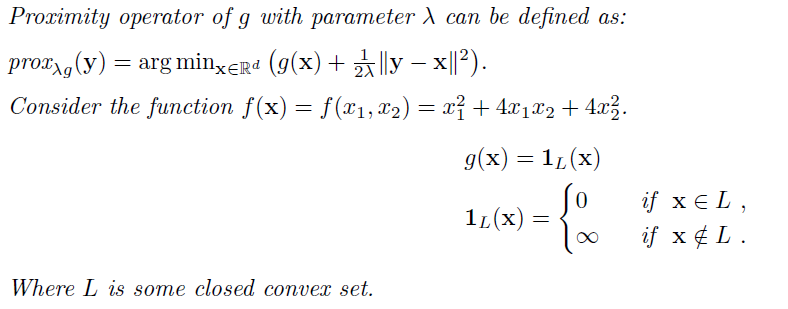

What is the minimizer and minimum function value of f(x) ?, Is the minimizer unique ?, Is it local or global
minima ?, Are the functions f(x) and g(x) convex ?, explain each of them

Note that $f(x_1, x_2) = x_1^2 + 4x_1x_2 + 4 x_2^2 = (x_1 + 2x_2)^2$ which is always positive hence it's minimum is 0 when $x_1 + 2x_2 = 0 ⇒ x_1 = -2x_2$ which is a line in 2 dimensions. The minimizer here is **not** **unique**, as it is a whole line meaning infinite minimizers. Though it is a global minima. The function f(x) is convex because its hessian is $\begin{bmatrix} 2&4 \\ 4 &8 \end{bmatrix}$ which a positive semidefinite. g(x) is some indicator on a convex set and  The indicator function of a set is convex if and only if the set is convex, which is true.

Ex 1 Part 2

Yes, we can implement algorithm 1 of this lab with the previous lab algo 1. The choice for $D_k $ will be $\begin{bmatrix} 0 .... 0 \\0..1..0 \\0 .... 0\end{bmatrix}$ which 1 at position $d_{ii}$ where i is the randomly selected coordinate.
$D_k$ does satisfies the condition of being P.S.D not P.D, as its eigen values are 0 or 1.

Implementation of code done below

rho |   minimizer |    minimum | iterations  | type
0.9  |  [ 1.         -0.49999938]   | 1.557309836641707e-12   | 5 | cordinate descent with Dk
------------------------------------------------------


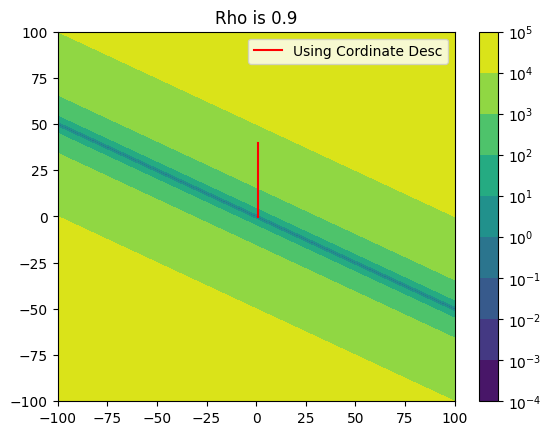

rho |   minimizer |    minimum | iterations  | type
0.8  |  [-10.05556007   5.02778059]   | 1.2505552149377763e-12   | 10 | cordinate descent with Dk
------------------------------------------------------


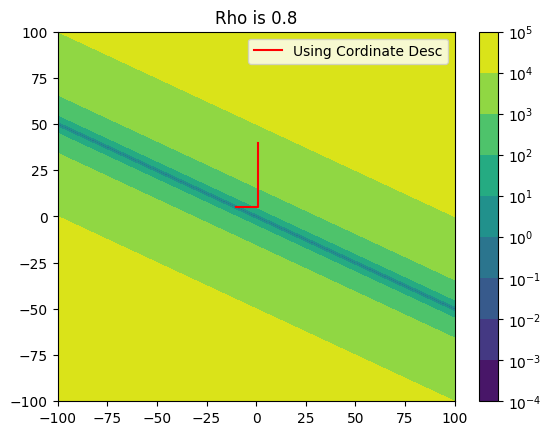

rho |   minimizer |    minimum | iterations  | type
0.75  |  [-12.61035441   6.30517769]   | 9.379164112033322e-13   | 11 | cordinate descent with Dk
------------------------------------------------------


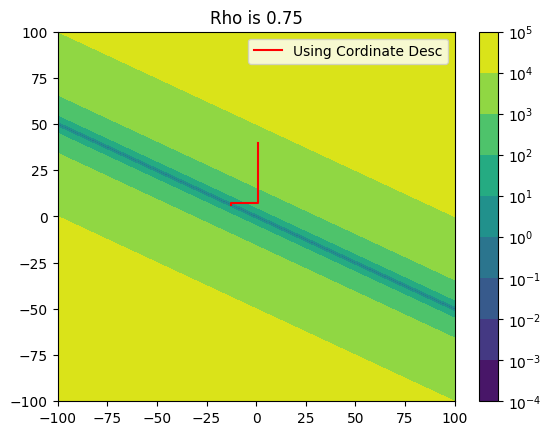

rho |   minimizer |    minimum | iterations  | type
0.6  |  [-10.55444082   5.27722088]   | 8.952838470577262e-13   | 16 | cordinate descent with Dk
------------------------------------------------------


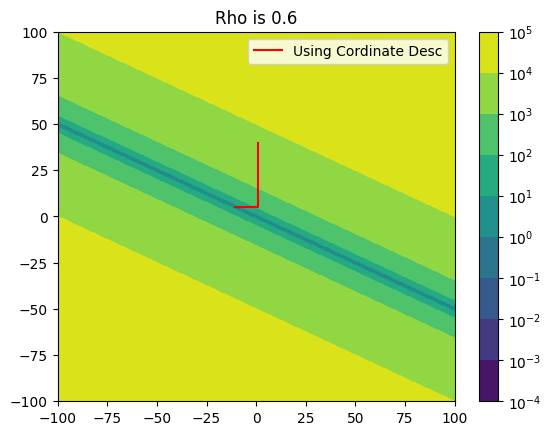

rho |   minimizer |    minimum | iterations  | type
0.5  |  [-80.  40.]   | 0.0   | 1 | cordinate descent with Dk
------------------------------------------------------


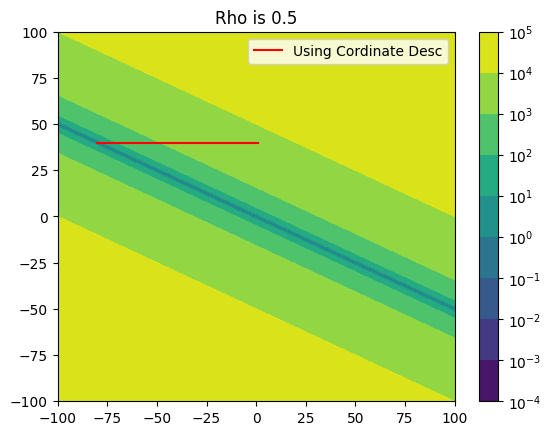

rho |   minimizer |    minimum | iterations  | type
0.4  |  [-79.90061744  39.95030952]   | 1.8189894035458565e-12   | 15 | cordinate descent with Dk
------------------------------------------------------


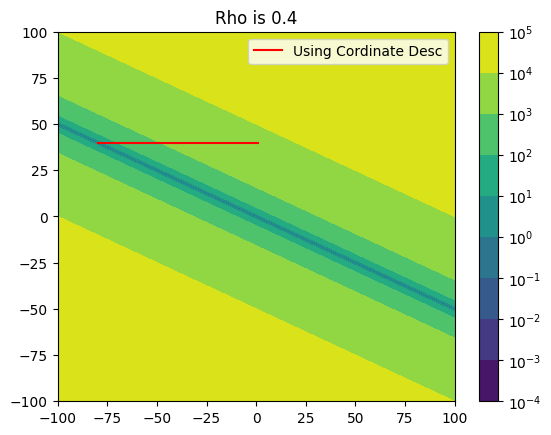

rho |   minimizer |    minimum | iterations  | type
0.25  |  [-75.43410443  37.71705282]   | 2.7284841053187847e-12   | 26 | cordinate descent with Dk
------------------------------------------------------


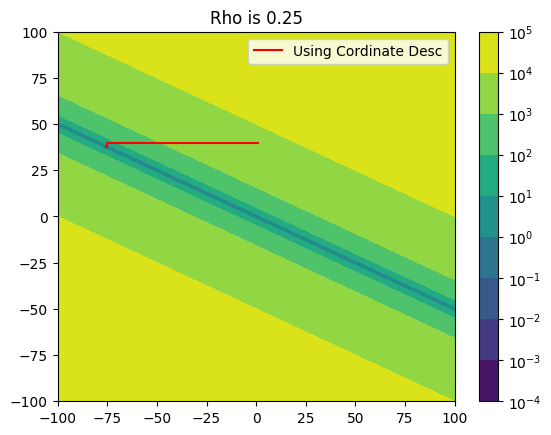

rho |   minimizer |    minimum | iterations  | type
0.1  |  [-10.10688538   5.0534436 ]   | 3.339550858072471e-12   | 23 | cordinate descent with Dk
------------------------------------------------------


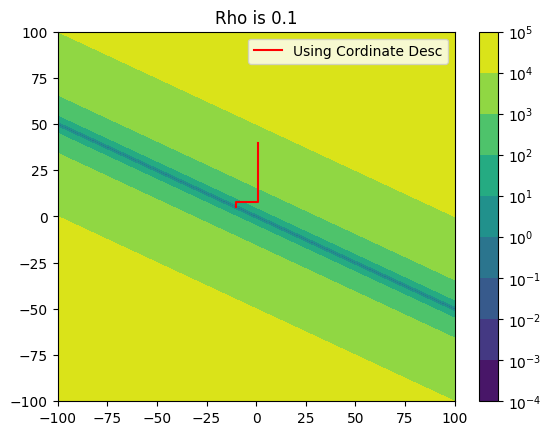

rho |   minimizer |    minimum | iterations  | type
0.01  |  [-6.27342675  3.13671441]   | 4.256150987203e-12   | 337 | cordinate descent with Dk
------------------------------------------------------


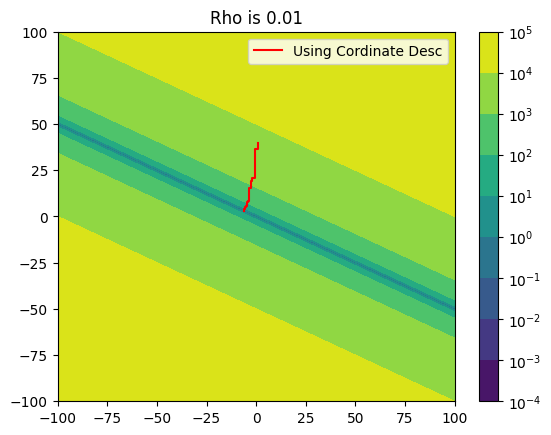

In [2]:
#part 2

x0 = np.array([1.,40.])
tau = 1e-5

def fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return x1**2 + 4*x1*x2 + 4*x2**2

def gradient_fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([2*x1 + 4*x2, 4*x1+ 8*x2])


#using algorithm 1 from lab 3

def get_alpha_for_coordinate_descent(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_fx(xk)
  while fx(xk + alpha*Dk@pk) > (fx(xk) + gamma*alpha*gradient_fx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def coordinate_descent(x0, tau, rho, gamma, alpha0):
  n = len(x0)
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_fx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    random_index = np.random.choice([i for i in range(n)])
    Dk = np.matmul(  np.eye(1,n,random_index,dtype=float).transpose(), np.eye(1,n,random_index, dtype=float))
    alpha =  get_alpha_for_coordinate_descent(xk, alpha0, rho, gamma, Dk)
    xk = xk + alpha*(Dk@pk)
    # xk[random_index] = xk[random_index] + alpha*pk[random_index]
    pk = -1*gradient_fx(xk)
    xks.append(xk)
    count += 1
  return count, xk, fx(xk), xks


gamma = 0.5
rhos = [0.9,0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
alpha0 = 1
iterations = []

for rho in rhos:
  count, minimizer, minimum, xks = coordinate_descent(x0, tau, rho, gamma, alpha0)
  print("rho |   minimizer |    minimum | iterations  | type")
  print(f'{rho}  |  {minimizer}   | {minimum}   | {count} | cordinate descent with Dk')
  print("------------------------------------------------------")
  iterations.append(count)
  #Plotting Trajectory
  x = np.linspace(-100, 100, 5000)
  y = np.linspace(-100, 100, 5000)
  X, Y = np.meshgrid(x, y)
  Z = fx((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)
  xcordinates1 = [el[0] for el in xks]
  ycordinates1 = [el[1] for el in xks]
  plt.plot(xcordinates1, ycordinates1, color='red', label = 'Using Cordinate Desc')
  plt.title(f"Rho is {rho}")
  # xcordinates2 = [xk1[0] for xk1 in xks2]
  # ycordinates2 = [xk1[1] for xk1 in xks2]
  # plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
  plt.legend()
  plt.show()



Text(0, 0.5, 'No. of Iterations')

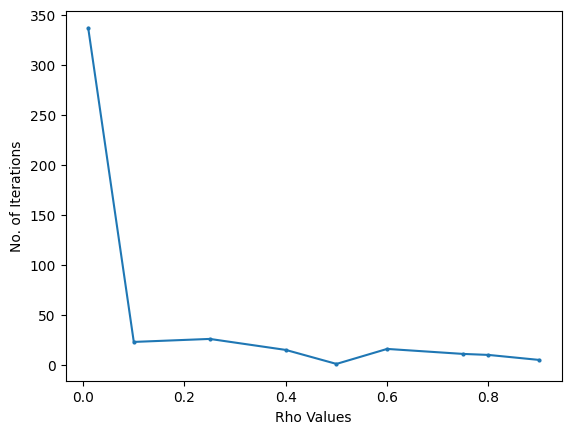

In [3]:
plt.plot(rhos, iterations, marker = 'o', markersize = 2)
plt.xlabel('Rho Values')
plt.ylabel('No. of Iterations')

As we decrease the rho the number of iterations are increasing for this descent method. Plotting the trajectory we observe that the we are only moving in one direction at a time.

Coordinate descent tends to converge quickly, especially in high-dimensional spaces. This is because it optimizes one coordinate at a time, allowing for potentially faster convergence than methods that optimize multiple coordinates simultaneously.

Simplicity: The algorithm is conceptually simple and easy to implement given the easy Dk value. It involves iteratively updating each coordinate while holding others fixed, which makes it straightforward to understand and implement.

Each iteration of coordinate descent involves updating a single coordinate, which can be computationally cheaper compared to methods that require updating all coordinates simultaneously. This can lead to faster convergence, especially in problems where updating each coordinate is relatively inexpensive.

Minimizers obtained are all different for different rho values thats because minimizers need not be unique and we are just going to that minimizer which we are reaching faster.

Level set have been plotted alongside rho values, from that we can observe that the steps that are taken are in one direction at a time only, either horizontal or vertical.

Update Strategy: Gradient descent with scaling updates all parameters simultaneously based on the gradients of the objective function, while coordinate descent updates one parameter at a time while holding others fixed.
Complexity: Gradient descent with scaling can be more computationally intensive, especially in high-dimensional spaces, due to the simultaneous update of all parameters. Coordinate descent, on the other hand, may be more efficient in such scenarios.

Convergence Behavior: While both algorithms aim to minimize the objective function, their convergence behavior can differ. Gradient descent with scaling tends to converge smoothly towards a local minimum, while coordinate descent may converge more quickly but to a potentially suboptimal local minimum.

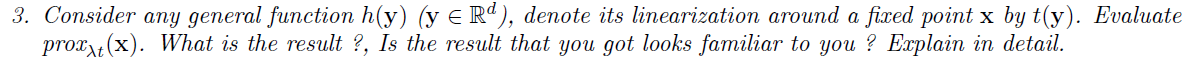

let the linearization of $h(y)$ be $t(y)$ then , $t(y) = h(x) + \nabla{h(x)}^T(y-x)$ around y. Then $prox_{\lambda t}(x) = argmin_{y}(t(y) + \frac{1}{2\lambda} \| y -x \|^2)$

let's differentiate this function with respect to y to get gradient.

$\frac{∂}{∂y}(t(y) + \frac{1}{2\lambda} \| y -x \|^2) = \nabla{t(y)} + \frac{1}{\lambda} (y -x) = \nabla{h(x)} + \frac{1}{\lambda} (y -x) = 0$

$x = y - \lambda\nabla{h(x)}$

which looks exactly like gradient descent step.

The result of evaluating  $prox_{\lambda t}(x)$ provides the point
x* that minimizes the proximal function t(y) while incorporating a proximity term that penalizes deviations from x with a weight determined by λ.

Overall, the proximal operator of the linearized function t(y) provides a point
that minimizes the linearized function while considering the proximity to the fixed point x, which is just gradient descent. This result is useful in optimization problems, particularly in contexts where the objective function can be locally approximated by a linear function around a given point.

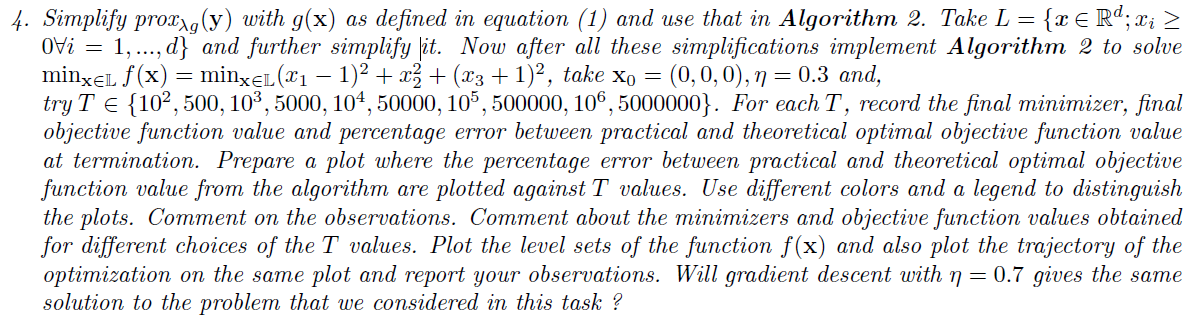

$$
\begin{aligned}
& \operatorname{prox}_{\lambda_g}(y)=\underset{x \in \mathbb{R}^d}{\operatorname{argmin}}\left(g(x)+\frac{1}{2 \lambda}\|y-x\|^2\right) \\
& g(y)=\mathbb{1}_L(y) \quad \begin{cases}0 & \text { if } y \in L \\
\infty & \text { if } y \notin L\end{cases}
\end{aligned}
$$
then,
$$
\text { case } 1 \quad y \in L \Rightarrow \underset{x \in \mathbb{R}^d}{\operatorname{argmin}}\left(0+\frac{1}{2 \lambda}\|y-x\|^2\right)=y
$$

Case $2 \quad y \notin L \Rightarrow$ then $x$ has to be in $L$ so that $\infty$ doesn't come which means, $x$ must be closest point in $L$ to $y$ ( $x$ is projection of $y$ onto set $L$ ).
$$
\therefore \quad x^*=\operatorname{projection}_L(y) \text {. }
$$
if $L=\left\{x \in \mathbb{R}^d, \quad x_i \geqslant 0 \quad \forall i\right\}$
then, $x^*=\left\{\max \left(x_i, 0\right) \quad \forall i\right\}$
is the projection onto first octant.


In [4]:
# implementation of algo 2
import numpy as np

def fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  x3 = xk[2]
  return (x1 -1)**2 + x2**2 + (x3 + 1)**2

def gradient_fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  x3 = xk[2]
  return np.array([2*(x1-1), 2*x2, 2*(x3+1)])

def proximity_operator(x0):
  x = []
  for i in range(len(x0)):
    x.append(max(x0[i], 0 ))
  return x

def proximal_gradient_descent(x0, step_size, lamda,  max_iter):
    t = 0
    xt= np.copy(x0)
    xks = []
    xks.append(x0)
    for _ in range(max_iter):
        grad = gradient_fx(xt)
        # print("Grad: ", grad)
        yt = xt - step_size*grad
        # print("yt is: ", yt)
        xt = proximity_operator(yt)
        # print("xt is: ", xt)
        xks.append(xt)
    return xt, fx(xt), xks

# Example usage
x0 = np.array([0., 0., 0.])
step_size = 0.3
T = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
minimizers = []
lamda = 1
print("Max_Iter |   minimizer |    minimum  ")
print('------------------------------------------------------')
for t in T:
  minimizer, minimum, xks= proximal_gradient_descent(x0, step_size, lamda, t)
  minimizers.append(minimizer)
  print(f'{t}  |  {minimizer}   | {minimum} ')
  print("------------------------------------------------------")
  #Plotting Trajectory
  # x = np.linspace(-100, 100, 5000)
  # y = np.linspace(-100, 100, 5000)
  # X, Y = np.meshgrid(x, y)
  # Z = fx((X,Y))
  # p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  # cbar = plt.colorbar(p)
  # xcordinates1 = [el[0] for el in xks]
  # ycordinates1 = [el[1] for el in xks]
  # plt.plot(xcordinates1, ycordinates1, color='red', label = 'Proximal')
  # # xcordinates2 = [xk1[0] for xk1 in xks2]
  # # ycordinates2 = [xk1[1] for xk1 in xks2]
  # # plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
  # plt.legend()
  # plt.show()

Max_Iter |   minimizer |    minimum  
------------------------------------------------------
100  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
500  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
1000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
5000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
10000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
50000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
100000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
500000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
1000000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
5000000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------



Percentage error, also known as relative error, is a measure used to quantify the accuracy of an approximation or measurement compared to the true or expected value. It is calculated as the absolute difference between the measured value (or approximation) and the true value, divided by the true value, and then multiplied by 100 to express the result as a percentage.

here percentage error will be infinite because true optimal is 0 which cannot be divided

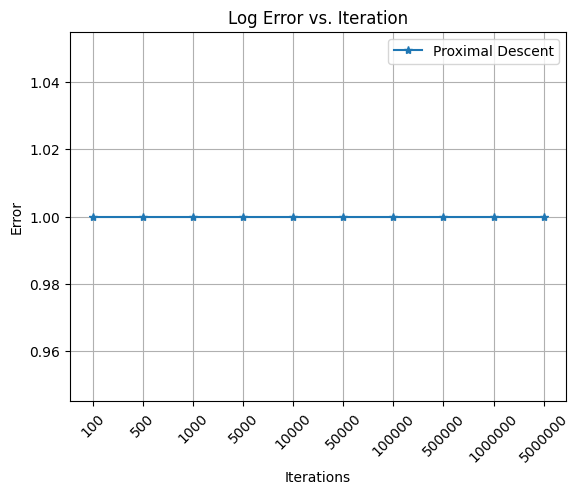

In [5]:
# Calculate the error for each iteration
proximal_error = [np.abs(fx(x) - fx(np.array([1., 0., -1.]))) for x in minimizers]

# Plot log error vs. iterations
plt.plot(proximal_error, label="Proximal Descent", marker='*')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.xticks(ticks = [i for i in range(len(proximal_error))] ,labels = [str(x) for x in T], rotation =45 )
plt.title("Log Error vs. Iteration")
plt.legend()
plt.grid(True)
plt.show()

Observing the minimizers for each max_iter, we get [1,0,0] which is not the actual optimal value. But once it reaches this point, it always returns the same value again after projection. It take always the max_iter time because we haven't set a stopping condition.

for eeta = 0.7

In [6]:
x0 = np.array([0., 0., 0.])
step_size = 0.7
T = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
lamda = 1
print("Max_Iter |   minimizer |    minimum  ")
print('------------------------------------------------------')
for t in T:
  minimizer, minimum, xks= proximal_gradient_descent(x0, step_size, lamda, t)
  print(f'{t}  |  {minimizer}   | {minimum} ')
  print("------------------------------------------------------")

Max_Iter |   minimizer |    minimum  
------------------------------------------------------
100  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
500  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
1000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
5000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
10000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
50000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
100000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
500000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
1000000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------
5000000  |  [1.0, 0.0, 0]   | 1.0 
------------------------------------------------------


This also shows similar behaviour like 0.3 hence no difference

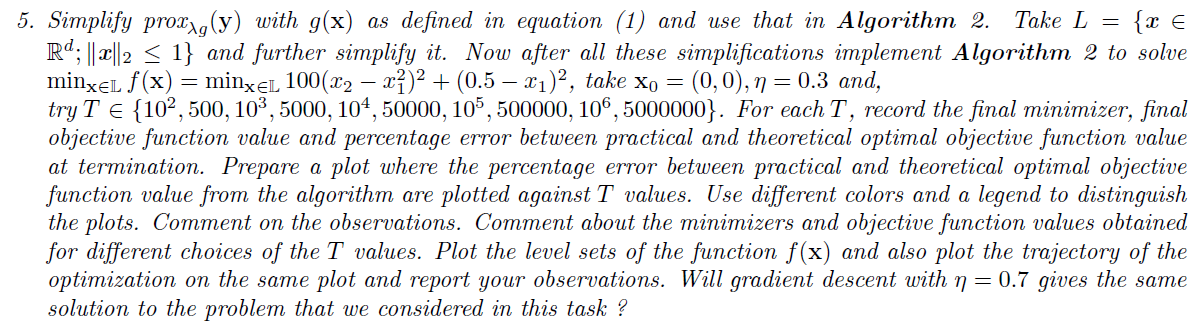

$$
\begin{aligned}
& \operatorname{prox}_{\lambda_g}(y)=\underset{x \in \mathbb{R}^d}{\operatorname{argmin}}\left(g(x)+\frac{1}{2 \lambda}\|y-x\|^2\right) \\
& g(y)=\mathbb{1}_L(y) \quad \begin{cases}0 & \text { if } y \in L \\
\infty & \text { if } y \notin L\end{cases}
\end{aligned}
$$
then,
$$
\text { case } 1 \quad y \in L \Rightarrow \underset{x \in \mathbb{R}^d}{\operatorname{argmin}}\left(0+\frac{1}{2 \lambda}\|y-x\|^2\right)=y
$$

Case $2 \quad y \notin L \Rightarrow$ then $x$ has to be in $L$ so that $\infty$ doesn't come which means, $x$ must be closest point in $L$ to $y$ ( $x$ is projection of $y$ onto set $L$ ).
$$
\therefore \quad x^*=\operatorname{projection}_L(y) \text {. }
$$

If $L =\{ x \in R^d :  \|x\|_2 \leq 1 \}$, then

if $ y \in L$ then $x = y$ itself

if $ y \notin L$ then x is boundary point in L closest to y which is just a unit vector on unit circle $ x = \frac{y}{\|y\|}$


------------------------------------------------------
Max_Iter |   minimizer |    minimum  
100  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


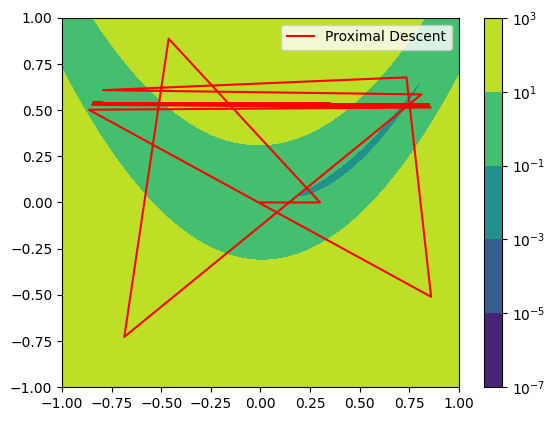

Max_Iter |   minimizer |    minimum  
500  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


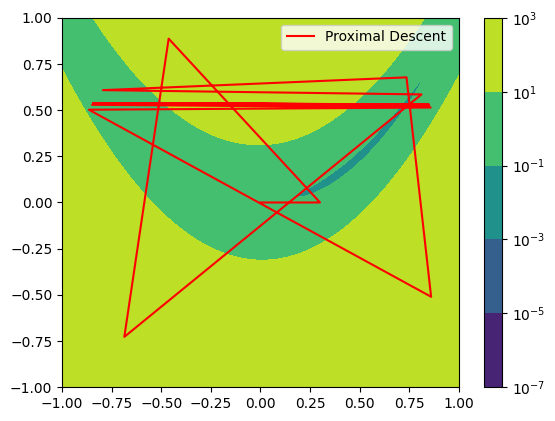

Max_Iter |   minimizer |    minimum  
1000  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


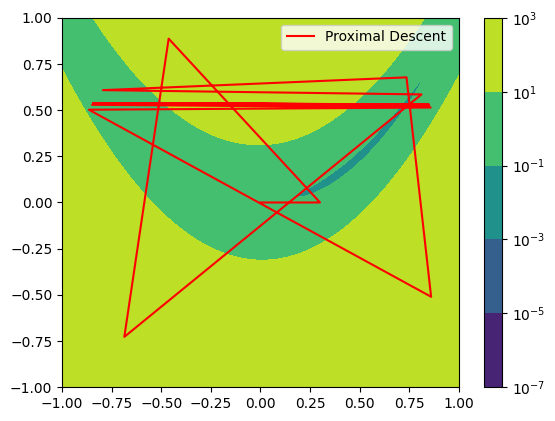

Max_Iter |   minimizer |    minimum  
5000  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


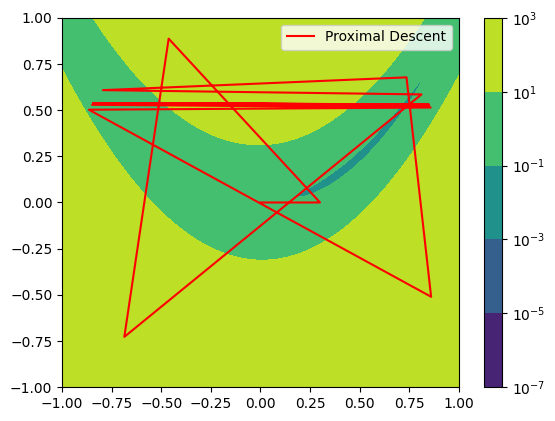

Max_Iter |   minimizer |    minimum  
10000  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


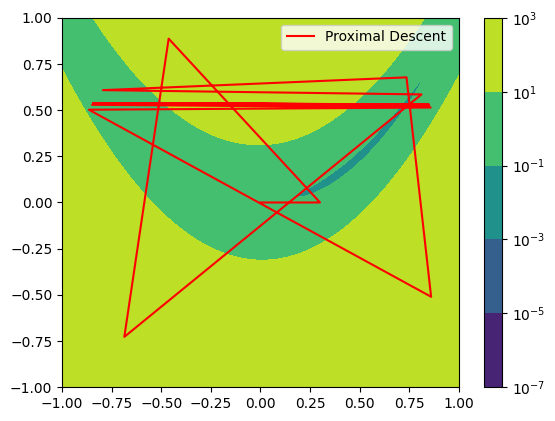

Max_Iter |   minimizer |    minimum  
50000  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


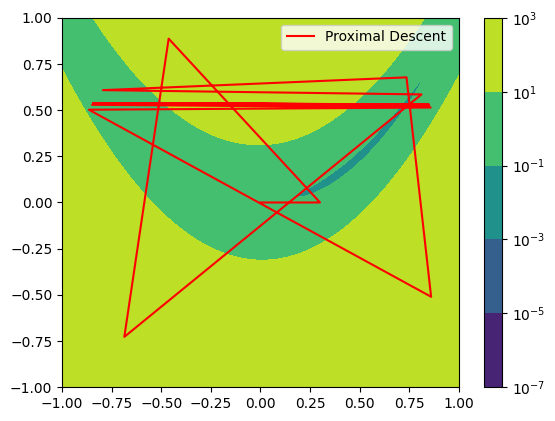

Max_Iter |   minimizer |    minimum  
100000  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


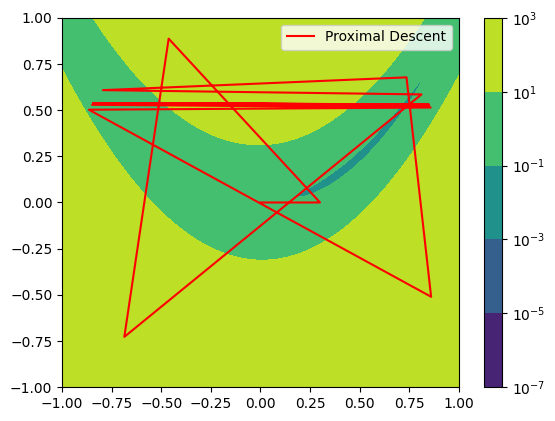

Max_Iter |   minimizer |    minimum  
500000  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


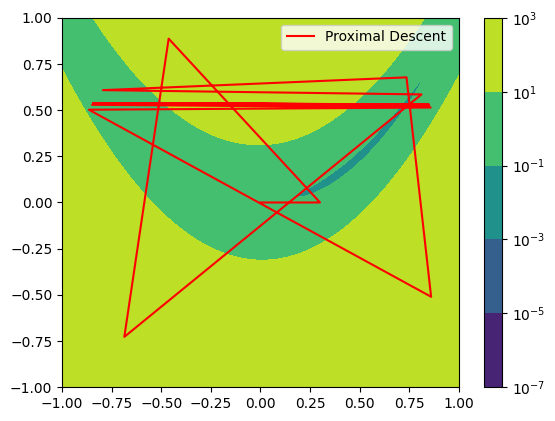

Max_Iter |   minimizer |    minimum  
1000000  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


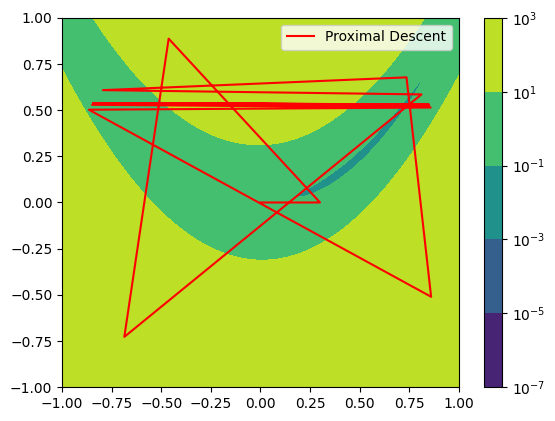

Max_Iter |   minimizer |    minimum  
5000000  |  [-0.84274164  0.53831824]   | 4.757752550249121 
------------------------------------------------------


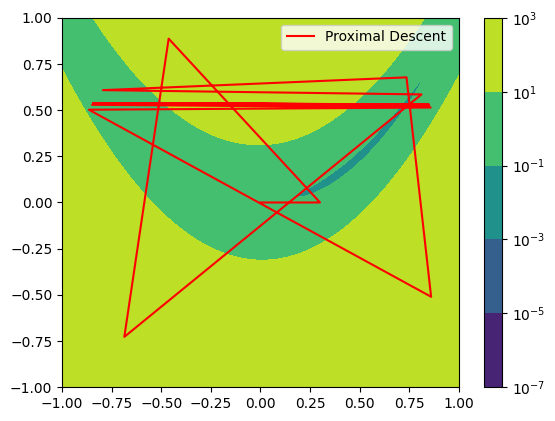

In [7]:
import numpy as np

def fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return 100*(x2 -x1**2)**2 + (0.5-x1)**2

def gradient_fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([-400*x1*(x2-x1**2)-2*(0.5-x1), 200*(x2-x1**2) ])

def proximity_operator(x0):
  if norm(x0) <= 1:
    return x0
  else: return x0/norm(x0)

def proximal_gradient_descent(x0, step_size, lamda,  max_iter):
    t = 0
    xt= np.copy(x0)
    xks = []
    xks.append(x0)
    for _ in range(max_iter):
        grad = gradient_fx(xt)
        # print("Grad: ", grad)
        yt = xt - step_size*grad
        # print("yt is: ", yt)
        xt = proximity_operator(yt)
        # print("xt is: ", xt)
        xks.append(xt)
    return xt, fx(xt), xks

# Example usage
x0 = np.array([0., 0.])
step_size = 0.3
T = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
lamda = 1
minimizers = []

print('------------------------------------------------------')
for t in T:
  minimizer, minimum, xks= proximal_gradient_descent(x0, step_size, lamda, t)
  minimizers.append(minimizer)
  print("Max_Iter |   minimizer |    minimum  ")
  print(f'{t}  |  {minimizer}   | {minimum} ')
  print("------------------------------------------------------")
  #Plotting Trajectory
  x = np.linspace(-1, 1, 5000)
  y = np.linspace(-1, 1, 5000)
  X, Y = np.meshgrid(x, y)
  Z = fx((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)
  xcordinates1 = [el[0] for el in xks]
  ycordinates1 = [el[1] for el in xks]
  plt.plot(xcordinates1, ycordinates1, color='red', label = 'Proximal Descent')
  # xcordinates2 = [xk1[0] for xk1 in xks2]
  # ycordinates2 = [xk1[1] for xk1 in xks2]
  # plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
  plt.legend()
  plt.show()

here percentage error will be infinite because true optimal is 0 which cannot be divided. Hence again plotting the normal error.

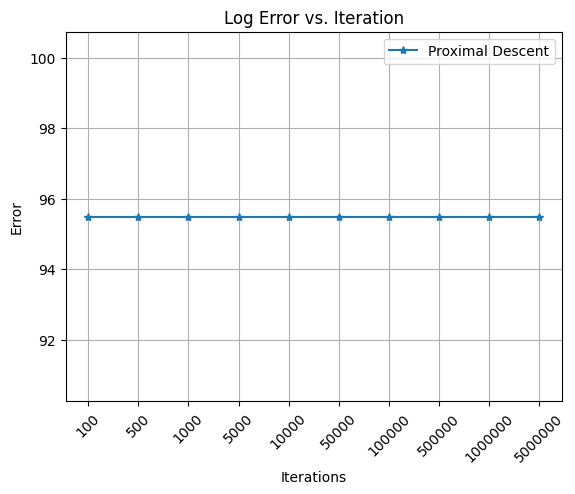

In [9]:
# Calculate the error for each iteration
proximal_error = [np.abs(fx(x) - fx(np.array([1., 0., -1.]))) for x in minimizers]
# print(proximal_error)
# Plot log error vs. iterations
plt.plot(proximal_error, label="Proximal Descent", marker='*')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.xticks(ticks = [i for i in range(len(proximal_error))] ,labels = [str(x) for x in T], rotation =45 )
plt.title("Log Error vs. Iteration")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Example usage
x0 = np.array([0., 0.])
step_size = 0.7
T = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
lamda = 1
print("Max_Iter |   minimizer |    minimum  ")
print('------------------------------------------------------')
for t in T:
  minimizer, minimum, xks= proximal_gradient_descent(x0, step_size, lamda, t)
  print(f'{t}  |  {minimizer}   | {minimum} ')
  print("------------------------------------------------------")
  # #Plotting Trajectory
  # x = np.linspace(-2, 2, 5000)
  # y = np.linspace(-2, 2, 5000)
  # X, Y = np.meshgrid(x, y)
  # Z = fx((X,Y))
  # p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  # cbar = plt.colorbar(p)
  # xcordinates1 = [el[0] for el in xks]
  # ycordinates1 = [el[1] for el in xks]
  # plt.plot(xcordinates1, ycordinates1, color='red', label = 'coordinate descent')
  # # xcordinates2 = [xk1[0] for xk1 in xks2]
  # # ycordinates2 = [xk1[1] for xk1 in xks2]
  # # plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
  # plt.legend()
  # plt.show()

Max_Iter |   minimizer |    minimum  
------------------------------------------------------
100  |  [-0.86146579  0.50781561]   | 7.343599057006626 
------------------------------------------------------
500  |  [-0.86146579  0.50781561]   | 7.343599057006626 
------------------------------------------------------
1000  |  [-0.86146579  0.50781561]   | 7.343599057006626 
------------------------------------------------------
5000  |  [-0.86146579  0.50781561]   | 7.343599057006626 
------------------------------------------------------
10000  |  [-0.86146579  0.50781561]   | 7.343599057006626 
------------------------------------------------------
50000  |  [-0.86146579  0.50781561]   | 7.343599057006626 
------------------------------------------------------
100000  |  [-0.86146579  0.50781561]   | 7.343599057006626 
------------------------------------------------------
500000  |  [-0.86146579  0.50781561]   | 7.343599057006626 
------------------------------------------------------

OBSERVATIONS: observing the trajectory and minimizers, we see that the proximal doesn't converge to the actaul optimal point, instead gets stuck at a point [-0.84274164  0.53831824] for eeta = 0.3. Similary for eeta = .7 they also get stuck at [-0.86146579  0.50781561] which is not optimal.

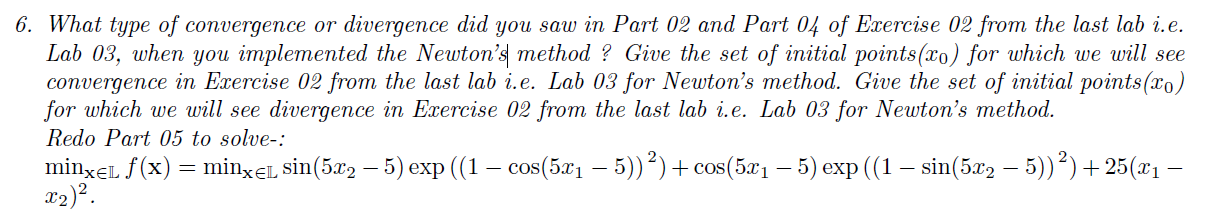

We saw oscillation type divergence in newton's method in part 2 or part 4.

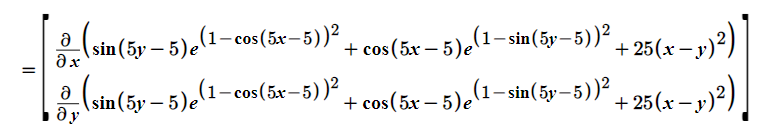

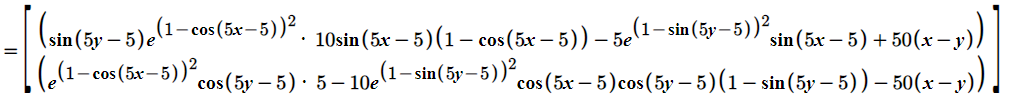

In [10]:
import numpy as np
from numpy import sin, cos,exp

def fx(xk):
  x = xk[0]
  y = xk[1]
  t = 5*x - 5
  m = 5*y - 5
  return sin(m)*exp( (1-cos(t))**2 ) + cos(t)*exp( (1-sin(m))**2 ) + (t-m)**2

def gradient_fx(xk):
  x = xk[0]
  y = xk[1]
  t = 5*x - 5
  m = 5*y - 5
  return np.array( [sin(m)*exp( (1-cos(t))**2 )*10*sin(t)*(1-cos(t)) - 5*exp((1-sin(m))**2)*sin(t) + 10*(t-m) ,
                    cos(m)*exp( (1-cos(t))**2 )*5 - 10*cos(t)*cos(m)*(1-sin(m))*exp((1-sin(m))**2) - 10*(t-m)] )

def proximity_operator(x0):
  if norm(x0) <= 1:
    return x0
  else: return x0/norm(x0)

def proximal_gradient_descent(x0, step_size, lamda,  max_iter):
    t = 0
    xt= np.copy(x0)
    xks = []
    xks.append(x0)
    for _ in range(max_iter):
        grad = gradient_fx(xt)
        # print("Grad: ", grad)
        yt = xt - step_size*grad
        # print("yt is: ", yt)
        xt = proximity_operator(yt)
        # print("xt is: ", xt)
        xks.append(xt)
    return xt, fx(xt), xks

# Example usage
x0 = np.array([0., 0.])
step_size = 0.3
T = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
lamda = 1
print("Max_Iter |   minimizer |    minimum  ")
print('------------------------------------------------------')
for t in T:
  minimizer, minimum, xks= proximal_gradient_descent(x0, step_size, lamda, t)
  print(f'{t}  |  {minimizer}   | {minimum} ')
  print("------------------------------------------------------")
  # #Plotting Trajectory
  # x = np.linspace(-1, 1, 5000)
  # y = np.linspace(-1, 1, 5000)
  # X, Y = np.meshgrid(x, y)
  # Z = fx((X,Y))
  # p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  # cbar = plt.colorbar(p)
  # xcordinates1 = [el[0] for el in xks]
  # ycordinates1 = [el[1] for el in xks]
  # plt.plot(xcordinates1, ycordinates1, color='red', label = 'coordinate descent')
  # # xcordinates2 = [xk1[0] for xk1 in xks2]
  # # ycordinates2 = [xk1[1] for xk1 in xks2]
  # # plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
  # plt.legend()
  # plt.show()

Max_Iter |   minimizer |    minimum  
------------------------------------------------------
100  |  [-0.3339816  0.9425796]   | 45.261256440094144 
------------------------------------------------------
500  |  [-0.9996857  -0.02506995]   | 49.9464287080135 
------------------------------------------------------
1000  |  [-0.93429259  0.35650717]   | 43.04570370632672 
------------------------------------------------------
5000  |  [-0.74963082  0.6618562 ]   | -15.13165820584927 
------------------------------------------------------
10000  |  [-0.36718902  0.93014634]   | 46.8836949161152 
------------------------------------------------------
50000  |  [-0.91367293  0.40645021]   | 30.586474939728365 
------------------------------------------------------
100000  |  [-0.99869362 -0.05109849]   | 47.117898742777285 
------------------------------------------------------
500000  |  [-0.06609943 -0.99781304]   | 23.060013317644884 
-----------------------------------------------------